In [1]:
import pandas as pd
import numpy as np

In [3]:
dataset= pd.read_csv("twitter_data.csv")
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [5]:
dataset.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [6]:
dataset["label"]= dataset["class"].map({0: "Hate Speech",
                                        1: "Offensive language",
                                        2: "no hate or offense"})

In [7]:
data = dataset[["tweet","label"]]

In [8]:
data

,tweet,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,no hate or offense
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive language
24779,"you've gone and broke the wrong heart baby, an...",no hate or offense
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive language
24781,youu got wild bitches tellin you lies,Offensive language


In [14]:
import re
import nltk
import string

In [13]:
#importing stopwords for removal of stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))
#importing stemming
stemmer = nltk.SnowballStemmer("english")

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [18]:
# Data Cleaning
def clean_data(text):
    text = str(text).lower()
    text = re.sub('https?://\$+|www\$+','',text)
    text = re.sub('\[.*?\]','',text)
    text = re.sub('<*?>+','',text)
    text = re.sub('[%s]' %re.escape(string.punctuation),'',text)
    text = re.sub('\n','',text)
    text = re.sub('\w*\d\w*','',text)
    # stop words removal
    text = [word for word in text.split(' ') if word not in stopwords]
    text = " ".join(text)
    # stemming the text
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

In [19]:
data["tweet"] = data["tweet"].apply(clean_data)

C:\Users\HP\AppData\Local\Temp\ipykernel_1708\1832165696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"] = data["tweet"].apply(clean_data)


In [20]:
data

,tweet,label
0,rt mayasolov woman shouldnt complain clean ho...,no hate or offense
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive language
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive language
3,rt cganderson vivabas look like tranni,Offensive language
4,rt shenikarobert shit hear might true might f...,Offensive language
...,...,...
24778,yous muthafin lie coreyemanuel right tl tras...,Offensive language
24779,youv gone broke wrong heart babi drove redneck...,no hate or offense
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive language
24781,youu got wild bitch tellin lie,Offensive language


In [21]:
X = np.array(data["tweet"])
Y = np.array(data["label"])

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [26]:
cv = CountVectorizer()
X = cv.fit_transform(X)

In [27]:
X

<24783x26152 sparse matrix of type '<class 'numpy.int64'>'
	with 198289 stored elements in Compressed Sparse Row format>

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [30]:
# Building ML Model
from sklearn.tree import DecisionTreeClassifier

In [31]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [32]:
y_pred = dt.predict(X_test)

In [33]:
y_pred

array(['Offensive language', 'Offensive language', 'Offensive language',
       ..., 'Offensive language', 'Offensive language',
       'Offensive language'], dtype=object)

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [38]:
cm = confusion_matrix(Y_test, y_pred)

In [39]:
cm

array([[ 150,  285,   30],
       [ 219, 5904,  212],
       [  29,  259, 1091]], dtype=int64)

In [40]:
accuracy_score(Y_test, y_pred)

0.87357867709989

In [47]:
import seaborn as sns
import matplotlib.pyplot as ply
%matplotlib inline

<AxesSubplot:>

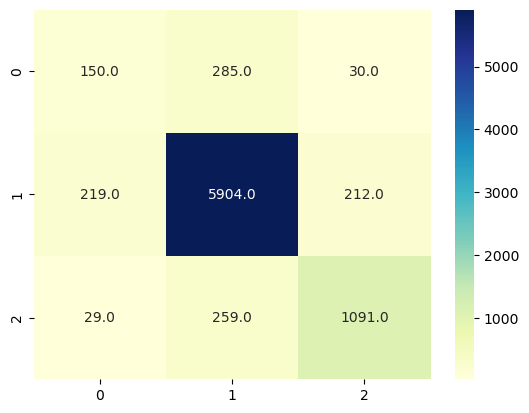

In [52]:
sns.heatmap(cm, annot = True, fmt =".1f", cmap="YlGnBu")

In [57]:
sample = "I will kill you"

In [58]:
sample = clean_data(sample)

In [59]:
sample

'kill'

In [60]:
data1 = cv.transform([sample]).toarray()

In [61]:
dt.predict(data1)

array(['Hate Speech'], dtype=object)